In [1]:
#importing all the libraries and csv file
from pandas import *
from numpy.random import *
from numpy import *
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df= read_csv('CleanedData.csv',engine='python')

In [2]:
df.head()

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating text,Votes,...,Kebab,Turkish Pizza,Izgara,World Cuisine,Dí_ner,Restaurant Cafe,Bí_rek,Döner,Börek,Fresh Fish
0,121.027535,14.565443,1100,1,0,0,0,3,1,314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,121.014101,14.553708,1200,1,0,0,0,3,1,591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,121.056831,14.581404,4000,1,0,0,0,4,4,270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,121.056475,14.585318,1500,0,0,0,0,4,1,365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,121.057508,14.584450,1500,1,0,0,0,4,1,229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39304 entries, 0 to 39303
Columns: 158 entries, Longitude to Fresh Fish
dtypes: float64(150), int64(8)
memory usage: 47.4 MB


In [4]:
y=df['Rating text'] 
X=df.drop(["Rating text"], axis=1) 
print(y)

0        1
1        1
2        4
3        1
4        1
        ..
39299    2
39300    2
39301    2
39302    2
39303    2
Name: Rating text, Length: 39304, dtype: int64


In [5]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
y_test

16432    2
14397    4
20117    4
23753    2
23133    0
        ..
26628    0
36633    0
12954    4
28237    2
22159    0
Name: Rating text, Length: 11792, dtype: int64

In [6]:
#used to save ml model for loading later
from pickle import dump

In [7]:
#PART THREE: TESTING DIFFERENT CLASSIFIERS

#-----------------------------------K-NN --------------------------------------------------

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)

classifier.fit(x_train,y_train)
dump(classifier, open("knn.sav", 'wb'))
knn_score=classifier.score(x_test,y_test)
print(f"K-NN:\n Accuracy: {knn_score*100}%")

K-NN:
 Accuracy: 85.78697421981005%


In [8]:
#-----------------------Logistic Regression---------------------------------------------
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',random_state = 0)

classifier.fit(x_train,y_train)
dump(classifier, open("logistic_regression.sav", 'wb'))
lr_score=classifier.score(x_test,y_test)
print(f"Logistic Regression:\n Accuracy: {lr_score*100}%")

Logistic Regression:
 Accuracy: 53.67198100407056%


In [9]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

classifier.fit(x_train,y_train)
dump(classifier, open("svm.sav", 'wb'))
svm_score=classifier.score(x_test,y_test)
print(f"SVM:\n Accuracy: {svm_score*100}%")

SVM:
 Accuracy: 52.1370420624152%


In [10]:
#---------------------------------Naive Bayes-------------------------------------------

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(x_train,y_train)
dump(classifier, open("naive_bayes.sav", 'wb'))
nb_score=classifier.score(x_test,y_test)
print(f"Naive Bayes:\n Accuracy: {nb_score*100}%")

Naive Bayes:
 Accuracy: 50.703867028493896%


In [11]:
#----------------------------Random Forest------------------------------------------

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

classifier.fit(x_train,y_train)
dump(classifier, open("random_forest.sav", 'wb'))
rf_score=classifier.score(x_test,y_test)
print(f"Random Forest:\n Accuracy: {rf_score*100}%")

Random Forest:
 Accuracy: 97.09972862957937%


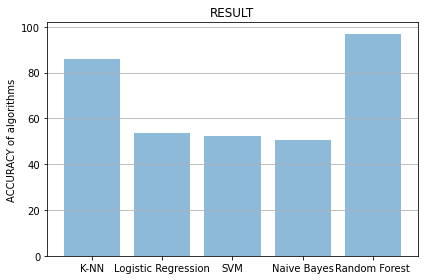

In [12]:
# Build the plot
n=arange(len(["K-NN","Logistic Regression","SVM","Naive Bayes","Random Forest"]))
acr=[knn_score,lr_score,svm_score,nb_score,rf_score]
for i in range(len(acr)):
    acr[i]*=100
fig, ax = plt.subplots()
ax.bar(n, acr, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('ACCURACY of algorithms')
ax.set_xticks(n)
ax.set_xticklabels(["K-NN","Logistic Regression","SVM","Naive Bayes","Random Forest"])
ax.set_title('RESULT')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()